In [29]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
from sklearn import metrics
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
import statsmodels.api as sm
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import pickle

In [2]:
#load the dataset
df = pd.read_csv('book_data_cleaned.csv')
df.head()

,bookID,title,authors,average_rating,isbn13,language,num_pages,ratings_count,text_reviews_count,publisher,publication_year,age
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,9780439785969,English,652,2095690,27591,Scholastic Inc.,2006,16
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,9780439358071,English,870,2153167,29221,Scholastic Inc.,2004,18
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,9780439554893,English,352,6333,244,Scholastic,2003,19
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,9780439655484,English,435,2339585,36325,Scholastic Inc.,2004,18
4,9,"Unauthorized Harry Potter Book Seven News: ""Ha...",W. Frederick Zimmerman,3.74,9780976540601,English,152,19,1,Nimble Books,2005,17


In [3]:
#choose relavant columns
df_model = df[['bookID', 'title', 'authors', 'average_rating', 'language',
       'num_pages', 'ratings_count', 'text_reviews_count', 'publisher',
       'publication_year', 'age']]

In [4]:
#feature engineering
#encode categorical variables (title, authors, publisher)
le = preprocessing.LabelEncoder()
df_model['title'] = le.fit_transform(df_model['title'])
df_model['authors'] = le.fit_transform(df_model['authors'])
df_model['publisher'] = le.fit_transform(df_model['publisher'])


#get dummy data for categorical variables (languages)
df_dum = pd.get_dummies(df_model['language'])

df_model = pd.concat([df_model, df_dum], axis = 1)

/Users/cerenkasap/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/cerenkasap/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/Users/cerenkasap/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_

In [5]:
df_model.head()

,bookID,title,authors,average_rating,language,num_pages,ratings_count,text_reviews_count,publisher,publication_year,...,Malay,Multiple languages,Norwegian,Portuguese,Russian,Serbian,Spanish,Swedish,Turkish,Welsh
0,1,3017,2583,4.57,English,652,2095690,27591,1764,2006,...,0,0,0,0,0,0,0,0,0,0
1,2,3018,2583,4.49,English,870,2153167,29221,1764,2004,...,0,0,0,0,0,0,0,0,0,0
2,4,3015,2579,4.42,English,352,6333,244,1759,2003,...,0,0,0,0,0,0,0,0,0,0
3,5,3020,2583,4.56,English,435,2339585,36325,1764,2004,...,0,0,0,0,0,0,0,0,0,0
4,9,9519,6205,3.74,English,152,19,1,1357,2005,...,0,0,0,0,0,0,0,0,0,0


In [6]:
df_dum.head()

,Aleut,Ancient Greek,Arabic,Chinese,Dutch,English,French,Gaelic,Galician,German,...,Malay,Multiple languages,Norwegian,Portuguese,Russian,Serbian,Spanish,Swedish,Turkish,Welsh
0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
#train test split
X = df_model.drop(['average_rating', 'language'], axis = 1)
y = df_model['average_rating'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)



In [8]:
#stat models
X_sm = X = sm.add_constant(X)
model = sm.OLS(y,X_sm)
model.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.037
Model:                            OLS   Adj. R-squared:                  0.035
Method:                 Least Squares   F-statistic:                     14.04
Date:                Wed, 09 Mar 2022   Prob (F-statistic):           4.77e-69
Time:                        19:23:13   Log-Likelihood:                -3798.3
No. Observations:               10906   AIC:                             7659.
Df Residuals:                   10875   BIC:                             7885.
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               2.494e-06   1.97e-07     12.653      0.000    2.11e-06    2.88e-06
bookID             -7.293e-07   2.53e-07     -2.886      0.004   -1.22e-06   -2.34e-07
title               1.808e-06   1.14e-06      1.591      0.112   -4.19e-07    4.03e-06
authors             2.717e-06   1.76e-06      1.544      0.123   -7.33e-07    6.17e-06
num_pages              0.0002   1.82e-05     10.861      0.000       0.000       0.000
ratings_count       9.281e-08   5.81e-08      1.597      0.110   -2.11e-08    2.07e-07
text_reviews_count  7.233e-07   2.54e-06      0.284      0.776   -4.26e-06    5.71e-06
publisher           7.576e-06   4.92e-06      1.540      0.124   -2.07e-06    1.72e-05
publication_year       0.0019   2.67e-05     70.080      0.000       0.002       0.002
age                    0.0032      0.000      7.931      0.000       0.002       0.004
Aleut                  0.4787      0.332      1.441      0.150      -0.172       1.130
Ancient Greek         -0.2095      0.112     -1.876      0.061      -0.428       0.009
Arabic                -0.3505      0.332     -1.055      0.291      -1.002       0.301
Chinese                0.5649      0.102      5.541      0.000       0.365       0.765
Dutch                  0.1941      0.332      0.584      0.559      -0.457       0.845
English                0.0440      0.052      0.853      0.394      -0.057       0.145
French                 0.0868      0.058      1.487      0.137      -0.028       0.201
Gaelic                 0.6449      0.332      1.942      0.052      -0.006       1.296
Galician              -0.5920      0.332     -1.783      0.075      -1.243       0.059
German                 0.0529      0.061      0.861      0.389      -0.068       0.173
Italian                0.1845      0.155      1.187      0.235      -0.120       0.489
Japanese               0.3948      0.071      5.553      0.000       0.255       0.534
Latin                  0.5110      0.196      2.602      0.009       0.126       0.896
Malay                  0.1561      0.332      0.470      0.638      -0.495       0.807
Multiple languages     0.1894      0.092      2.067      0.039       0.010       0.369
Norwegian             -0.2382      0.332     -0.717      0.473      -0.889       0.413
Portuguese             0.1058      0.116      0.912      0.362      -0.121       0.333
Russian                0.3466      0.238      1.459      0.145      -0.119       0.812
Serbian               -3.8765      0.332    -11.673      0.000      -4.527      -3.226
Spanish                0.0501      0.056      0.892      0.372      -0.060       0.160
Swedish               -0.4084      0.238     -1.719      0.086      -0.874       0.057
Turkish                0.5369      0.332      1.617      0.106      -0.114       1.188
Welsh                  1.1336      0.3

In [16]:
#Linear regression model
lr=LinearRegression()
lr.fit(X_train, y_train)
y_train_pred_lr = lr.predict(X_train)
y_test_pred_lr = lr.predict(X_test)


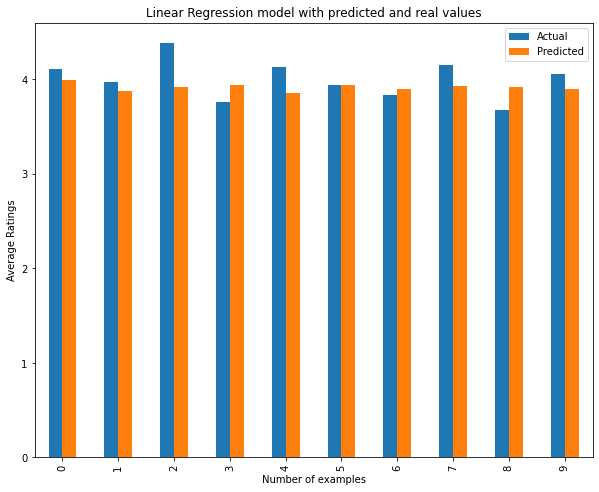

In [17]:
#Barchart
pred = pd.DataFrame({'Actual': y_test.tolist(), 'Predicted': y_test_pred_lr.tolist()}).head(10)
pred.head(10)
pred.plot(kind='bar', figsize=(10, 8))
plt.title('Linear Regression model with predicted and real values')
plt.xlabel('Number of examples')
plt.ylabel('Average Ratings')
plt.savefig('images/Linear_Reg_Model.png', dpi=300)

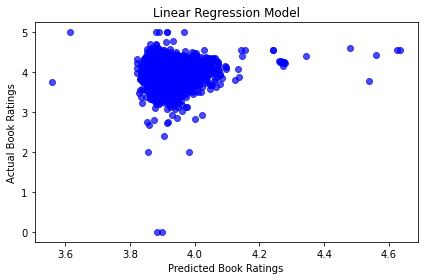

In [18]:
#Linear Regression scatter plot
plt.scatter(predictions, y_test, alpha = 0.7, color = 'b')

plt.xlabel('Predicted Book Ratings')
plt.ylabel('Actual Book Ratings')
plt.title('Linear Regression Model')
plt.tight_layout()
plt.savefig('images/Linear_Reg.png', dpi=300)
plt.show()

In [19]:
#Model Performance Evaluation

print('MSE in Linear Regression train: %.3f, test: %.3f' % (
        mean_squared_error(y_train, y_train_pred_lr),
        mean_squared_error(y_test, y_test_pred_lr)))
print('R^2 in Linear Regression train: %.3f, test: %.3f' % (
        r2_score(y_train, y_train_pred_lr),
        r2_score(y_test, y_test_pred_lr)))
print('MAE in Linear Regression train: %.3f, test: %.3f' % (
        mean_absolute_error(y_train, y_train_pred_lr),
        mean_absolute_error(y_test, y_test_pred_lr)))
print('RMSE in Linear Regression train: %.3f, test: %.3f' % (
        np.sqrt(metrics.mean_squared_error(y_train, y_train_pred_lr)),
        np.sqrt(metrics.mean_squared_error(y_test, y_test_pred_lr))))



MSE in Linear Regression train: 0.122, test: 0.098
R^2 in Linear Regression train: 0.042, test: 0.008
MAE in Linear Regression train: 0.228, test: 0.223
RMSE in Linear Regression train: 0.350, test: 0.313


In [20]:
#Random forest
forest = RandomForestRegressor(n_estimators=1000, 
                               criterion='squared_error', 
                               random_state=1, 
                               n_jobs=-1)
forest.fit(X_train, y_train)
y_train_pred_rf = forest.predict(X_train)
y_test_pred_rf = forest.predict(X_test)


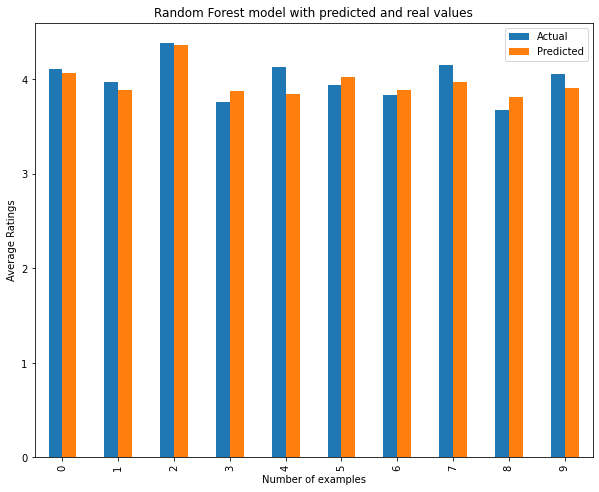

In [25]:
#Bar chat
pred1 = pd.DataFrame({'Actual': y_test.tolist(), 'Predicted': y_test_pred_rf.tolist()}).head(10)
pred1.head(10)
pred1.plot(kind='bar', figsize=(10, 8))
plt.title('Random Forest model with predicted and real values')
plt.xlabel('Number of examples')
plt.ylabel('Average Ratings')
plt.savefig('images/Random_Forest_Model.png', dpi=300)

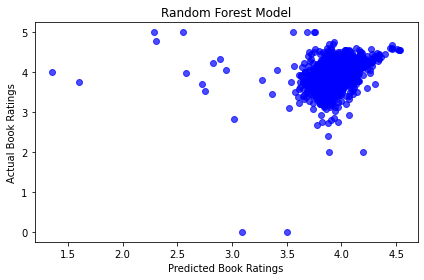

In [22]:
#Random Forest scatter plot
plt.scatter(y_test_pred_rf, y_test, alpha = 0.7, color = 'b')
plt.xlabel('Predicted Book Ratings')
plt.ylabel('Actual Book Ratings')
plt.title('Random Forest Model')
plt.tight_layout()
plt.savefig('images/Random_Forest.png', dpi=300)
plt.show()

In [27]:
#Model Performance Evaluation

print('MSE in Random Forest train: %.3f, test: %.3f' % (
        mean_squared_error(y_train, y_train_pred_rf),
        mean_squared_error(y_test, y_test_pred_rf)))
print('R^2 in Random Forest train: %.3f, test: %.3f' % (
        r2_score(y_train, y_train_pred_rf),
        r2_score(y_test, y_test_pred_rf)))
print('MAE in Random Forest train: %.3f, test: %.3f' % (
        mean_absolute_error(y_train, y_train_pred_rf),
        mean_absolute_error(y_test, y_test_pred_rf)))
print('RMSE in Random Forest train: %.3f, test: %.3f' % (
        np.sqrt(metrics.mean_squared_error(y_train, y_train_pred_rf)),
        np.sqrt(metrics.mean_squared_error(y_test, y_test_pred_rf))))



MSE in Random Forest train: 0.014, test: 0.101
R^2 in Random Forest train: 0.888, test: -0.019
MAE in Random Forest train: 0.079, test: 0.210
RMSE in Random Forest train: 0.120, test: 0.318


In [38]:
np.mean(cross_val_score(lr, X_train, y_train, scoring = 'neg_mean_absolute_error', cv=3))

-0.23003429503160636

In [34]:
np.mean(cross_val_score(forest, X_train, y_train, scoring = 'mean_absolute_error', cv=3))

-0.2154119131132506

In [43]:
#tune models Randomized Search
parameters = {'n_estimators':range(10,300,10), "criterion": ('squared_error', 'absolute_error'), "max_features":('auto', 'sqrt', 'log2')}
rs=RandomizedSearchCV(forest, parameters, scoring='neg_mean_absolute_error')
rs.fit(X_train, y_train)

RandomizedSearchCV(estimator=RandomForestRegressor(n_estimators=1000, n_jobs=-1,
                                                   random_state=1),
                   param_distributions={'criterion': ('squared_error',
                                                      'absolute_error'),
                                        'max_features': ('auto', 'sqrt',
                                                         'log2'),
                                        'n_estimators': range(10, 300, 10)},
                   scoring='neg_mean_absolute_error')

In [44]:
rs.best_score_

-0.21422495373711622

In [45]:
rs.best_estimator_

RandomForestRegressor(criterion='absolute_error', n_estimators=220, n_jobs=-1,
                      random_state=1)

In [53]:
#pickle the model
pickl = {'model': rs.best_estimator_}
pickle.dump( pickl, open( 'model_file' + ".p", "wb" ) )

file_name = "model_file.p"
with open(file_name, 'rb') as pickled:
    data = pickle.load(pickled)
    model = data['model']

In [56]:
#predictions
model.predict(np.array(list(X_test.iloc[1,:])).reshape(1,-1))[0]

/Users/cerenkasap/opt/anaconda3/lib/python3.7/site-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  "X does not have valid feature names, but"


3.914045454545455

In [57]:
#real data
y_test[1]

3.97

In [59]:
list(X_test.iloc[1,:])

[26586,
 7827,
 4149,
 112,
 400,
 32,
 1149,
 2003,
 19,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]